In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns


import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [5]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is 'C:\Users\arvin\Downloads/'



In [6]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE


'C:\\Users\\arvin\\Downloads\\Crimes_-_2001_to_Present_20231026.csv'

In [7]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [8]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,NaN,NaN,2002,02/04/2016 06:33:39 AM,NaN,NaN,NaN
2,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,NaN,NaN,2023,09/14/2023 03:43:09 PM,NaN,NaN,NaN
3,13210088,JG423627,08/31/2023 12:00:00 PM,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,...,27.0,28.0,11,1160870.0,1898642.0,2023,09/16/2023 03:41:56 PM,41.877565,-87.684791,"(41.877565108, -87.68479102)"
4,13210004,JG422532,07/24/2023 09:45:00 PM,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,7.0,43.0,02,1190812.0,1856743.0,2023,09/16/2023 03:41:56 PM,41.761919,-87.576209,"(41.7619185, -87.576209245)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7920298,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
7920299,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
7920300,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
7920301,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [9]:
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
56810,1310741,G001135,01/01/2001 01:00:00 PM,047XX N ELSTON AV,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,...,NaN,08B,1145613.0,1931427.0,2001,08/17/2015 03:03:40 PM,41.967833,-87.739978,"(41.96783306, -87.739978195)",2001-01-01 01:00:00
75911,1311144,G001320,01/01/2001 01:00:00 AM,063XX N LEAVITT ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1160455.0,1942042.0,2001,08/17/2015 03:03:40 PM,41.996666,-87.685110,"(41.99666603, -87.685109858)",2001-01-01 01:00:00
3049226,5462733,HN290220,01/01/2001 01:00:00 AM,058XX S INDIANA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,40.0,20,1178551.0,1866538.0,2001,04/25/2007 05:57:12 AM,41.789084,-87.620849,"(41.789084341, -87.620849345)",2001-01-01 01:00:00
147932,1315987,G001152,01/01/2001 01:00:00 AM,009XX N HUDSON AV,1310,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,...,NaN,14,1173036.0,1906862.0,2001,08/17/2015 03:03:40 PM,41.899860,-87.639877,"(41.899860332, -87.63987705)",2001-01-01 01:00:00
94917,1325760,G001074,01/01/2001 01:00:00 PM,029XX S CALIFORNIA AV,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,...,NaN,18,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32351,13251091,JG468931,10/18/2023 12:00:00 AM,073XX S SOUTH SHORE DR,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,...,43.0,10,1195265.0,1857288.0,2023,10/25/2023 03:42:43 PM,41.763305,-87.559871,"(41.763305308, -87.559870854)",2023-10-18 12:00:00
32748,13247047,JG468005,10/18/2023 12:00:00 AM,019XX N WESTERN AVE,0560,ASSAULT,SIMPLE,CTA STATION,False,False,...,22.0,08A,1160062.0,1912639.0,2023,10/25/2023 03:42:43 PM,41.915991,-87.687371,"(41.915990756, -87.687370839)",2023-10-18 12:00:00
32540,13249969,JG471502,10/18/2023 12:00:00 AM,100XX W OHARE ST,0810,THEFT,OVER $500,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,False,False,...,76.0,06,1100658.0,1934241.0,2023,10/25/2023 03:42:43 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)",2023-10-18 12:00:00
32070,13254110,JG476467,10/18/2023 12:00:00 AM,005XX W 36TH ST,1780,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,APARTMENT,False,False,...,60.0,20,NaN,NaN,2023,10/25/2023 03:42:43 PM,NaN,NaN,NaN,2023-10-18 12:00:00


In [10]:
chicago_full['Datetime'].dt.year

56810      2001
75911      2001
3049226    2001
147932     2001
94917      2001
           ... 
32351      2023
32748      2023
32540      2023
32070      2023
32498      2023
Name: Datetime, Length: 7920303, dtype: int64

In [11]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486808
2001    485893
2003    475986
2004    469423
2005    453774
2006    448179
2007    437091
2008    427185
2009    392826
2010    370517
2011    351997
2012    336325
2013    307542
2014    275796
2016    269839
2017    269111
2018    268926
2015    264801
2019    261369
2022    239008
2020    212236
2021    208919
2023    206752
Name: Year, dtype: int64

In [12]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [13]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,2001,41.967833,-87.739978
2001-01-01 01:00:00,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,2001,41.996666,-87.685110
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849
2001-01-01 01:00:00,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,2001,41.899860,-87.639877
2001-01-01 01:00:00,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,2001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-18 12:00:00,13251091,10/18/2023 12:00:00 AM,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,334,3.0,7.0,2023,41.763305,-87.559871
2023-10-18 12:00:00,13247047,10/18/2023 12:00:00 AM,ASSAULT,SIMPLE,CTA STATION,False,False,1434,14.0,1.0,2023,41.915991,-87.687371
2023-10-18 12:00:00,13249969,10/18/2023 12:00:00 AM,THEFT,OVER $500,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,False,False,1651,16.0,41.0,2023,41.976290,-87.905227


In [14]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [15]:
FINAL_DROP = ['Year']

In [16]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [17]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [18]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



In [19]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978
1,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
3,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877
4,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
206747,13251091,10/18/2023 12:00:00 AM,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,334,3.0,7.0,41.763305,-87.559871
206748,13247047,10/18/2023 12:00:00 AM,ASSAULT,SIMPLE,CTA STATION,False,False,1434,14.0,1.0,41.915991,-87.687371
206749,13249969,10/18/2023 12:00:00 AM,THEFT,OVER $500,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,False,False,1651,16.0,41.0,41.976290,-87.905227
206750,13254110,10/18/2023 12:00:00 AM,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,APARTMENT,False,False,915,9.0,11.0,NaN,NaN


In [20]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485893
2002    486808
2003    475986
2004    469423
2005    453774
2006    448179
2007    437091
2008    427185
2009    392826
2010    370517
2011    351997
2012    336325
2013    307542
2014    275796
2015    264801
2016    269839
2017    269111
2018    268926
2019    261369
2020    212236
2021    208919
2022    239008
2023    206752
Name: Date, dtype: int64

In [21]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978
1,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
3,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877
4,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7920303 entries, 0 to 206751
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 679.8+ MB


In [23]:
df['Date'][534]

534    01/01/2001 05:00:00 PM
534    01/01/2002 04:34:00 PM
534    01/01/2003 04:55:00 PM
534    01/01/2004 04:30:00 PM
534    01/01/2005 04:39:00 PM
534    01/01/2006 04:53:37 PM
534    01/01/2007 04:45:00 AM
534    01/01/2008 05:30:00 AM
534    01/01/2009 05:00:00 PM
534    01/01/2010 07:00:00 PM
534    01/01/2011 05:20:00 AM
534    01/01/2012 06:00:00 AM
534    01/01/2013 06:15:00 AM
534    01/01/2014 08:00:00 AM
534    01/01/2015 08:19:00 AM
534    01/01/2016 08:30:00 PM
534    01/01/2017 08:00:00 PM
534    01/01/2018 10:00:00 AM
534    01/01/2019 08:00:00 AM
534    01/01/2020 09:00:00 AM
534    01/01/2021 12:00:00 AM
534    01/01/2022 12:00:00 AM
534    01/01/2023 08:25:00 PM
Name: Date, dtype: object

In [24]:
fmt = "%m/%d/%Y %I:%M:%S %p"

In [25]:
df['Date'] = pd.to_datetime(df['Date'], format=fmt)  # Convert the 'Date' column to datetime
df.set_index('Date', inplace=True)  # Set the 'Date' column as the index

In [26]:
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1310741,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978
2001-01-01 01:00:00,1311144,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2001-01-01 01:00:00,5462733,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
2001-01-01 01:00:00,1315987,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877
2001-01-01 13:00:00,1325760,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN


# How do crime rates differ between police districts

In [27]:
crime_rates = df['District'].value_counts()
crime_rates

8.0     531893
11.0    507318
6.0     463276
7.0     456041
25.0    450114
4.0     449571
3.0     401566
12.0    393734
9.0     386456
2.0     375609
19.0    356740
18.0    356122
5.0     350416
10.0    341196
15.0    338029
1.0     322086
14.0    306041
16.0    265454
22.0    259304
24.0    239925
17.0    228625
20.0    140488
31.0       248
21.0         4
Name: District, dtype: int64

In [28]:
high_crime = crime_rates.idxmax()
high_crime

8.0

In [29]:
low_crime = crime_rates.idxmin()
low_crime

21.0

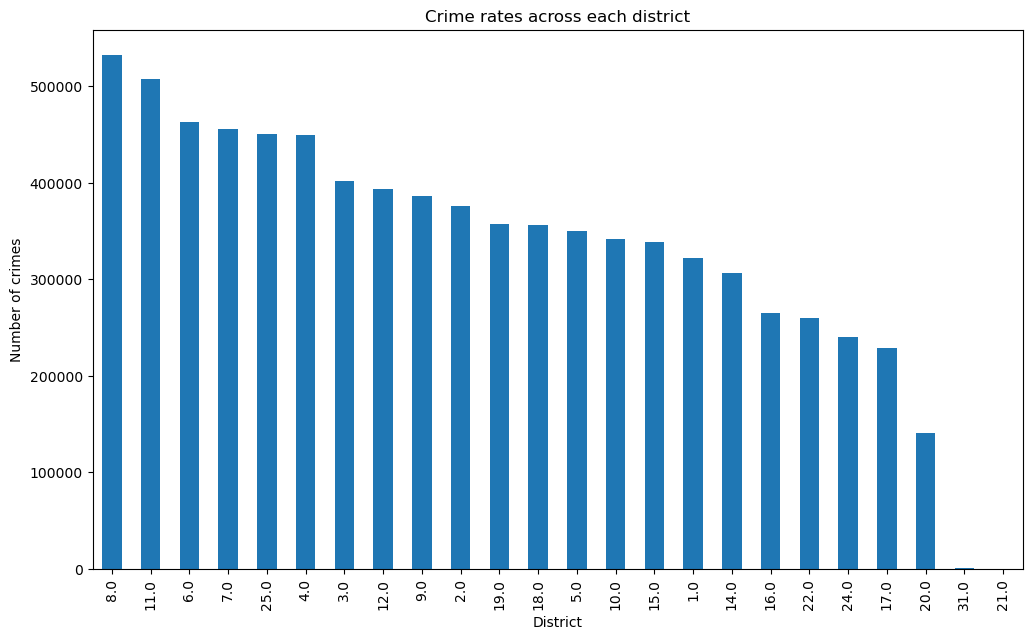

In [30]:
plt.figure(figsize = (12,7))
crime_rates.plot(kind='bar')
plt.title('Crime rates across each district')
plt.xlabel('District')
plt.ylabel('Number of crimes')
plt.show()

- District 8 has the most crime
- District 21 has the lowest crime rate

# How have crime rates changed over 20 years

In [31]:
df_20 = df.loc['2003':]
df_20.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2003-01-01 01:00:00,2552583,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,True,False,1922,19.0,47.0,41.963311,-87.676554
2003-01-01 13:00:00,2582131,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1522,15.0,29.0,41.878367,-87.763074
2003-01-01 13:00:00,2834877,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2123,2.0,4.0,41.812551,-87.596893
2003-01-01 01:00:00,2523382,THEFT,POCKET-PICKING,TAVERN/LIQUOR STORE,False,False,1933,19.0,43.0,41.925764,-87.649210
2003-01-01 01:00:00,2530234,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,321,3.0,5.0,41.774306,-87.603361


In [32]:
df_ts = df.copy()
eda_df = df.reset_index()
eda_df

,Date,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,2001-01-01 13:00:00,1310741,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978
1,2001-01-01 01:00:00,1311144,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2,2001-01-01 01:00:00,5462733,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
3,2001-01-01 01:00:00,1315987,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877
4,2001-01-01 13:00:00,1325760,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7920298,2023-10-18 00:00:00,13251091,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,334,3.0,7.0,41.763305,-87.559871
7920299,2023-10-18 00:00:00,13247047,ASSAULT,SIMPLE,CTA STATION,False,False,1434,14.0,1.0,41.915991,-87.687371
7920300,2023-10-18 00:00:00,13249969,THEFT,OVER $500,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,False,False,1651,16.0,41.0,41.976290,-87.905227
7920301,2023-10-18 00:00:00,13254110,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,APARTMENT,False,False,915,9.0,11.0,NaN,NaN


In [33]:
df_ts = eda_df.copy()
df_ts['year'] = df_ts['Date'].dt.year
df_ts.head()

,Date,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year
0,2001-01-01 13:00:00,1310741,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978,2001
1,2001-01-01 01:00:00,1311144,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110,2001
2,2001-01-01 01:00:00,5462733,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849,2001
3,2001-01-01 01:00:00,1315987,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877,2001
4,2001-01-01 13:00:00,1325760,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN,2001


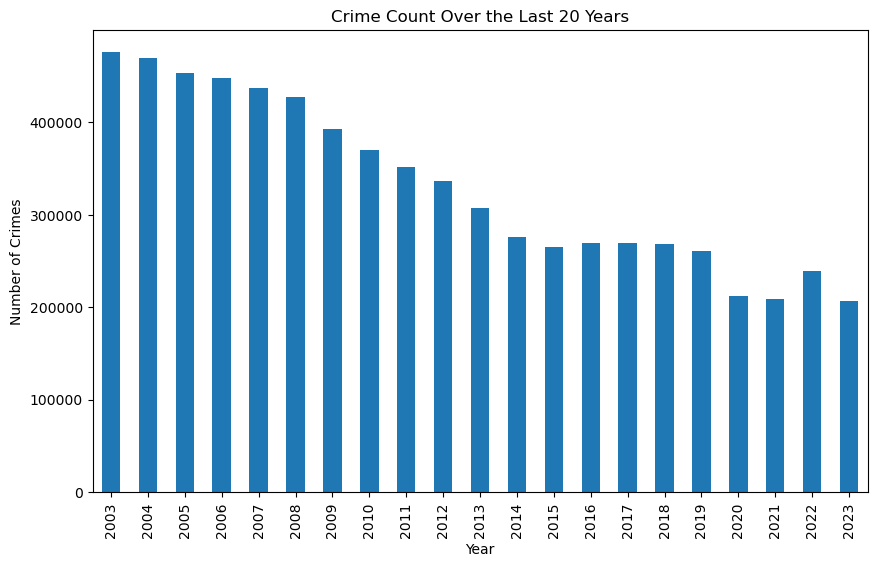

In [34]:
current_year = pd.Timestamp.now().year
last_20_year = df_ts[df_ts['year'] >= current_year - 20]
crime_by_year = last_20_year.groupby('year').size()
plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='bar')
plt.title('Crime Count Over the Last 20 Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

- the total crime rates has generally decreasing across the year
-from 2021 to 2022 has increased.

# How has the variance in crime changed over the years?​

C:\Users\arvin\AppData\Local\Temp\ipykernel_10452\2669738134.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crimes = df.resample('Y').sum()


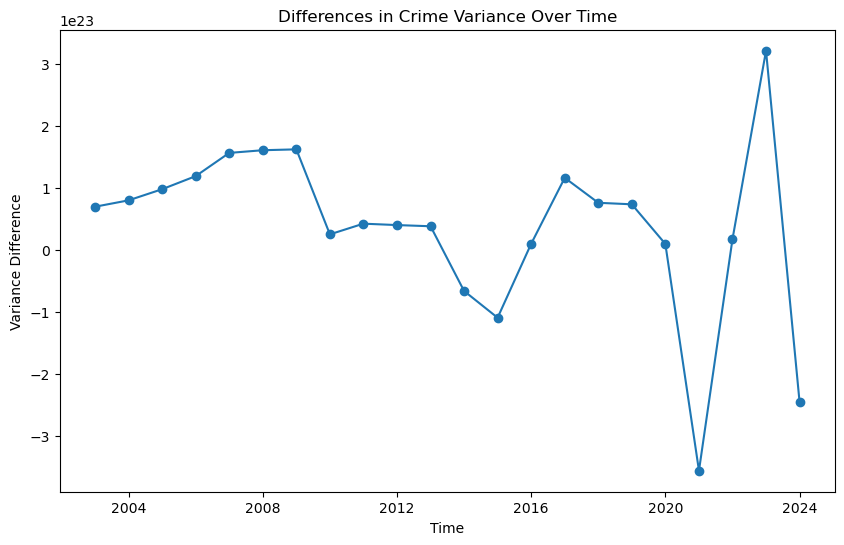

In [37]:
crimes = df.resample('Y').sum()

variance = crimes.var(axis=1)

variance_diff = variance.diff()

plt.figure(figsize=(10, 6))
plt.plot(variance_diff,marker='o', linestyle='-')
plt.title('Differences in Crime Variance Over Time')
plt.xlabel('Year')
plt.ylabel('Variance Difference')
plt.show()

- the variance of crime slowly increases at around 2009 and then decreases at 2010.
- The variance peaks at its highest at 2023 and peaks at its lowest in 2021.

In [ ]:
df.to_csv('Data/chicago_crime.csv')

In [ ]:
df.isnull.sum()

In [ ]:
crime_2021_2022 = df_ts[(df_ts['Date'].dt.year == 2021) | (df_ts['Date'].dt.year == 2022)]
null_values_in_2021_2022 = crime_2021_2022.isnull().sum()
print("Null values in the year 2021 and 2022:")
print(null_values_in_2021_2022)